In [2]:
from resnet101_fine_tune import MovieClipDataset
from PIL import Image
import matplotlib.pyplot as plt

dataset = MovieClipDataset(
    data_dir='/root/autodl-tmp/processed_data',
    sample_num=0,
    gaussian_blur_prob=0.5,
    random_crop_prob=0.25,
    random_flip_prob=0.25,
)

In [4]:
a, b = dataset.sample(1)

def multi_show(
    imgs, 
    titles=[], 
    figsize=(16, 9), 
    ncols=2,
    save_to=None
):
    plt.figure(figsize=figsize)
    nrows = len(imgs) // ncols + 1
    for i, img in enumerate(imgs):
        plt.subplot(nrows, ncols, i+1)
        plt.imshow(img)
        plt.axis('off')
        if len(titles) > i:
            plt.title(titles[i])
    plt.tight_layout()
    if save_to:
        plt.savefig(save_to, dpi=300, bbox_inches='tight', pad_inches=0.2)
    plt.show()

imgs = []
for i in range(6):
    imgs.extend(dataset.sample(i))

imgs = imgs[::2] + imgs[1::2]

multi_show(
    imgs,
    titles=['origin image']*6 + ['after augmentation']*6,
    ncols=6,
    save_to='random_augmentation.png',
)

IndexError: list index out of range

In [20]:
import requests
from PIL import Image
import io
import matplotlib.pyplot as plt

url = "https://image-retrieval.bitdancing.com/"

def multi_show(
    imgs, 
    titles=[], 
    figsize=(16, 9), 
    ncols=2,
    save_to=None
):
    plt.figure(figsize=figsize)
    nrows = len(imgs) // ncols + 1
    for i, img in enumerate(imgs):
        plt.subplot(nrows, ncols, i+1)
        plt.imshow(img)
        plt.axis('off')
        if len(titles) > i:
            plt.title(titles[i])
    plt.tight_layout()
    if save_to:
        plt.savefig(save_to, dpi=300, bbox_inches='tight', pad_inches=0.2)
    plt.show()

def query(img_path: str, fine_tune=False):

    ret = requests.post(
        url+'q',
        files={
            'img': open(img_path, 'rb')
        },
        params={
            "limit": 4,
            "t" : int(fine_tune)
        }
    )
    labels = ret.json()[0]
    labels = [label['entity']['en_label'] for label in labels]
    return labels

def get_img(labels):
    if isinstance(labels, str):
        labels = [labels]
    ret = [requests.get(url+'i/'+label.replace('#','/')) for label in labels]
    ret = [Image.open(io.BytesIO(r.content)) for r in ret]
    return ret

In [31]:
from glob import glob
imgs = []
titles = []

for i in glob('test/*'):
    label = query(i)
    imgs.extend([Image.open(i), *get_img(label)])
    label = query(i, fine_tune=True)
    imgs.extend(get_img(label))

    titles.extend(['query'])
    titles.extend(['']*8)

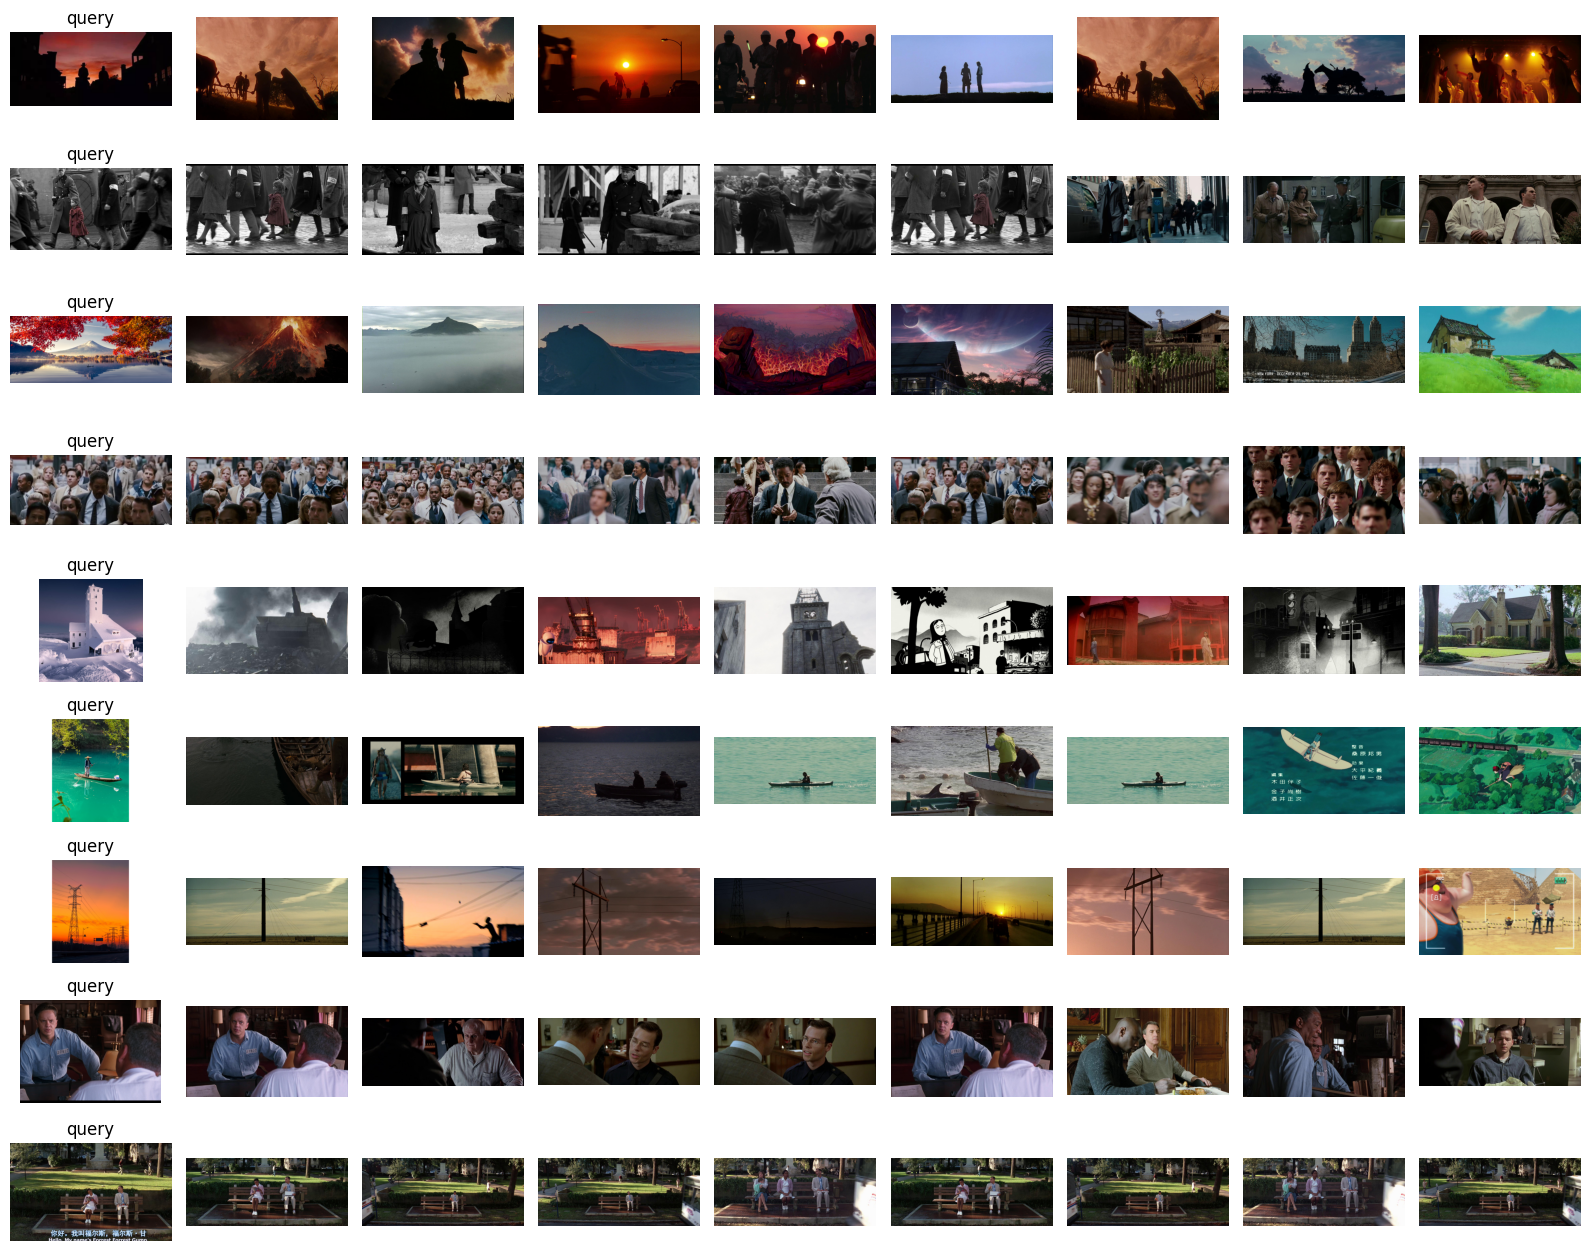

In [37]:
multi_show(
    imgs,
    titles=titles,
    ncols=9,
    save_to='query.png',
    figsize=(16, 14)
)

In [56]:
from glob import glob
imgs = []
titles = []

def query(img: bytes, fine_tune=False):

    # img = Image.open(img_path)
    # img = dataset.random_augment(img)
    # img_io = io.BytesIO()
    # img.save(img_io, format='JPEG')
    # img_io.seek(0)

    ret = requests.post(
        url+'q',
        files={
            'img': img
        },
        params={
            "limit": 4,
            "t" : int(fine_tune)
        }
    )
    labels = ret.json()[0]
    labels = [label['entity']['en_label'] for label in labels]
    return labels


for i in glob('test/*'):
    img = Image.open(i)
    img = dataset.random_augment(img)
    img_io = io.BytesIO()
    img.save(img_io, format='JPEG')
    img_io.seek(0)

    label = query(img_io)
    imgs.extend([img, *get_img(label)])
    img_io.seek(0)
    label = query(img_io, fine_tune=True)
    imgs.extend(get_img(label))

    titles.extend(['query'])
    titles.extend(['']*8)

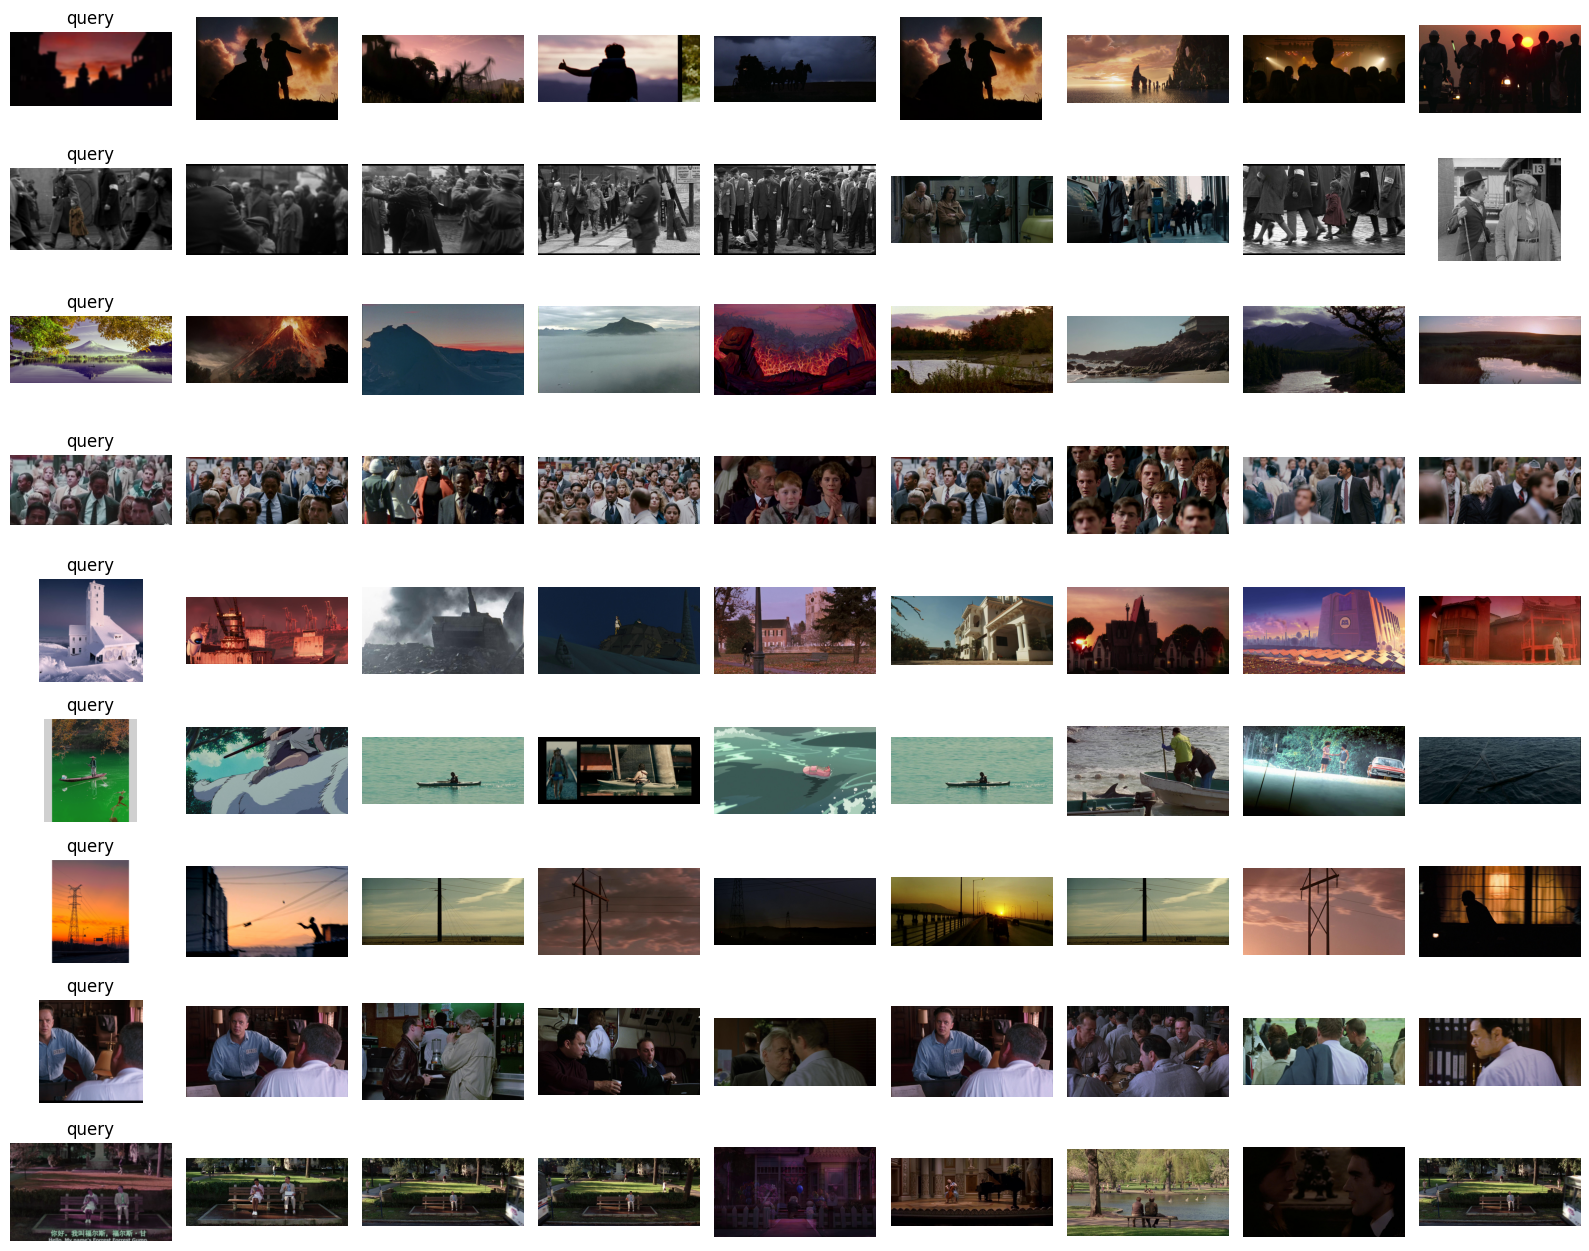

In [57]:
multi_show(
    imgs,
    titles=titles,
    ncols=9,
    save_to='query.png',
    figsize=(16, 14)
)